In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data_p100 = pd.read_csv('/content/drive/MyDrive/data_p100_features.csv')
#for row in data:

def make_chiselka(data):
  for i, row in data.iterrows():
    if (row['W_rating'] == 'N'):
      row['W_rating'] = '2d'
    if (row['W_rating'][1] == 'k'):
      row['chiselka'] = -int(row['W_rating'][0]) + 1
    else:
      row['chiselka'] = int(row['W_rating'][0])

def get_statistics(data):
  data['mean_deltawinrate'] = None
  data['mean_deltaScore50p'] = None
  data['mean_deltascoreLead'] = None
  data['dispersy_scoreLead'] = None
  data['beautiful_percent'] = None
  data['beautifulS_percent'] = None
  data['mean_utility'] = None
  data['Score25p'] = None
  data['Score75p'] = None
  data['Winrate25p'] = None
  data['Winrate75p'] = None
  data['mean_deltawinrate50p'] = None
  data['median_scorelead'] = None
  data['length'] = None
  data['chiselka'] = None
  data['mean_deltaSelfPlay'] = None
  data['BestScoreMove'] = None
  data['WorstScoreMove'] = None
  data['Mean5WorstScoreMove'] = None
  data['Mean5BestScoreMove'] = None

  for i, row in data.iterrows():
    row['W_scoreLead'] = [float(x) for x in row['W_scoreLead'].split()]
    row['B_scoreLead'] = [float(x) for x in row['B_scoreLead'].split()]
    row['W_scoreSelfplay'] = [float(x) for x in row['W_scoreSelfplay'].split()]
    row['B_scoreSelfplay'] = [float(x) for x in row['B_scoreSelfplay'].split()]
    row['W_scoreStdev'] = [float(x) for x in row['W_scoreStdev'].split()]
    row['B_scoreStdev'] = [float(x) for x in row['B_scoreStdev'].split()]
    row['W_utility'] = [float(x) for x in row['W_utility'].split()]
    row['B_utility'] = [float(x) for x in row['B_utility'].split()]
    row['W_winrate'] = [float(x) for x in row['W_winrate'].split()]
    row['B_winrate'] = [float(x) for x in row['B_winrate'].split()]
    row['length'] = len(row['W_winrate']) + len(row['B_winrate'])
    if (row['W_rating'] == 'N'):
      row['W_rating'] = '2d'
    if (row['W_rating'][1] == 'k'):
      row['chiselka'] = -int(row['W_rating'][0]) + 1
    else:
      row['chiselka'] = int(row['W_rating'][0])
    sum_win = 0
    cnt_beautiful = 0
    cnt_beautifulS = 0
    winrate_delta = []
    for i in range(min(len(row['W_winrate']), len(row['B_winrate']))):
      if (i != 0):
          winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
          cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
          cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
    row['mean_deltawinrate'] = np.mean(winrate_delta)  
    row['beautiful_percent'] = cnt_beautiful / (len(row['W_winrate']) - 1) 
    row['beautifulS_percent'] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
    sum_scoreLead = 0
    score_S = []
    scoreSelfplay = []
    utility = []
    for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
      if (i != 0):
          score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
          scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
          utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

    score_S.sort()
    winrate_delta.sort()

    row['Score25p'] = score_S[int(len(score_S) * 0.25)]
    row['Score75p'] = score_S[int(len(score_S) * 0.75)]
    row['BestScoreMove'] = np.max(score_S)
    row['WorstScoreMove'] = np.min(score_S)
    row['Mean5WorstScoreMove'] = np.mean(score_S[-5:])
    row['Mean5BestScoreMove'] = np.mean(score_S[:5])

    row['Winrate25p'] = winrate_delta[int(len(score_S) * 0.25)]
    row['Winrate75p'] = winrate_delta[int(len(score_S) * 0.75)]


    row['median_scorelead'] =  score_S[int(len(score_S) * 0.5)] 
    row['mean_deltascoreLead'] = np.mean(score_S)
    row['mean_deltaSelfPlay'] = np.mean(scoreSelfplay)
    if (row['length'] > 4):
      row['mean_deltaScore50p'] = np.mean(score_S[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
      row['mean_deltawinrate50p'] = np.mean(winrate_delta[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
    else:
      row['mean_deltawinrate50p'] = 0
      row['mean_deltaScore50p'] = 0;
    
    dispersy_scoreLead = 0
    for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
      if (i != 0):
          dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1] - row['mean_deltascoreLead']) ** 2
    row['dispersy_scoreLead'] = dispersy_scoreLead / (len(row['W_scoreLead']) - 1) 
    row['mean_utility'] = np.mean(utility)
  return data
#data = data[data['length'] > 50]

In [ ]:
#data_p100 = get_statistics(data_p100)
make_chiselka(data_p100)
aggreg100 = data_p100.groupby(['chiselka']).agg({'mean_deltawinrate' : 'mean', 'mean_deltascoreLead': 'mean', 'dispersy_scoreLead' : 'mean', 
                                'beautiful_percent': 'mean', 'mean_utility' : 'mean', 'beautifulS_percent': 'mean',
                                'Score25p': 'mean', 'Score75p' : 'mean', 'median_scorelead' : 'mean', 'mean_deltaScore50p': 'mean', 
                                'mean_deltaSelfPlay' : 'mean', 'Winrate25p': 'mean', 'Winrate75p' : 'mean', 'mean_deltawinrate50p' : 'mean'})
aggreg100.head(15)

,mean_deltawinrate,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,mean_utility,beautifulS_percent,Score25p,Score75p,median_scorelead,mean_deltaScore50p,mean_deltaSelfPlay,Winrate25p,Winrate75p,mean_deltawinrate50p
chiselka,,,,,,,,,,,,,,
-2,-0.047644,-2.743596,44.708747,0.281730,-0.106422,0.280358,-4.607444,0.192971,-1.477584,-1.791038,-2.902633,-0.066746,0.001091,-0.020338
-1,-0.047794,-2.703846,44.939662,0.279888,-0.106577,0.279158,-4.501308,0.173737,-1.470666,-1.767350,-2.862679,-0.066926,0.001322,-0.021091
0,-0.045976,-2.574474,46.531480,0.286433,-0.102760,0.288248,-4.237569,0.239411,-1.303600,-1.608233,-2.720489,-0.066276,0.001584,-0.019774
1,-0.045011,-2.468795,40.508713,0.292135,-0.100487,0.293631,-4.067801,0.238391,-1.243724,-1.521384,-2.616570,-0.062768,0.001308,-0.019206
2,-0.045430,-2.234949,40.044817,0.289424,-0.100557,0.297117,-3.700289,0.279590,-1.086949,-1.348403,-2.381925,-0.068733,0.001385,-0.021613
3,-0.040210,-2.050901,34.977030,0.294707,-0.089228,0.306111,-3.427120,0.275266,-0.991591,-1.238011,-2.183220,-0.059140,0.001419,-0.018158
4,-0.039968,-1.809669,30.310326,0.294224,-0.088186,0.311583,-3.034292,0.302170,-0.820120,-1.048151,-1.944296,-0.060267,0.001479,-0.018904
5,-0.038601,-1.687098,28.068031,0.301379,-0.084796,0.314035,-2.847975,0.286096,-0.787994,-0.995679,-1.817309,-0.060922,0.002292,-0.019332
6,-0.036612,-1.473525,21.172913,0.302872,-0.080024,0.319598,-2.582380,0.305569,-0.680196,-0.878071,-1.601874,-0.057688,0.001909,-0.018541


In [ ]:
data_p10 = pd.read_csv('/content/drive/MyDrive/data_p10_features.csv')
#data_p10 = get_statistics(data_p10)
aggreg10 = data_p10.groupby(['chiselka']).agg({'mean_deltawinrate' : 'mean', 'mean_deltascoreLead': 'mean', 'dispersy_scoreLead' : 'mean', 
                                'beautiful_percent': 'mean', 'mean_utility' : 'mean', 'beautifulS_percent': 'mean',
                                'Score25p': 'mean', 'Score75p' : 'mean', 'median_scorelead' : 'mean', 'mean_deltaScore50p': 'mean', 
                                'mean_deltaSelfPlay' : 'mean', 'Winrate25p': 'mean', 'Winrate75p' : 'mean', 'mean_deltawinrate50p' : 'mean', 'B_rating': 'count'})
aggreg10.head(15)

,mean_deltawinrate,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,mean_utility,beautifulS_percent,Score25p,Score75p,median_scorelead,mean_deltaScore50p,mean_deltaSelfPlay,Winrate25p,Winrate75p,mean_deltawinrate50p,B_rating
chiselka,,,,,,,,,,,,,,,
-2,-0.038847,-2.160720,45.950282,0.342153,-0.083814,0.330042,-3.855257,0.494613,-1.035579,-1.316376,-2.312431,-0.053795,0.003424,-0.014035,1315
-1,-0.036490,-1.918378,41.804252,0.345321,-0.078093,0.338001,-3.617100,0.595578,-0.917358,-1.187817,-2.075706,-0.051819,0.003600,-0.014203,1039
0,-0.034978,-1.872394,41.483538,0.351143,-0.074824,0.346363,-3.498957,0.600695,-0.891252,-1.143516,-2.015400,-0.051266,0.004246,-0.013217,1048
1,-0.035504,-1.818830,40.549269,0.348850,-0.075526,0.346954,-3.296380,0.569129,-0.835000,-1.072544,-1.964607,-0.050485,0.004208,-0.013191,1051
2,-0.034829,-1.606391,38.201349,0.356085,-0.073564,0.357290,-2.994152,0.640273,-0.684760,-0.908097,-1.748226,-0.051418,0.004856,-0.013325,1265
3,-0.032134,-1.456800,32.441968,0.363256,-0.067639,0.366055,-2.780687,0.626040,-0.643737,-0.848270,-1.600933,-0.049276,0.004890,-0.012670,1083
4,-0.031018,-1.295608,31.106197,0.368260,-0.064636,0.374917,-2.536283,0.655067,-0.527897,-0.712964,-1.433809,-0.048721,0.005460,-0.012391,1703
5,-0.029022,-1.168685,28.031722,0.372160,-0.060183,0.380109,-2.352359,0.603650,-0.467749,-0.649334,-1.298298,-0.046728,0.005937,-0.011813,1404
6,-0.026768,-1.017033,25.752977,0.379643,-0.054971,0.391106,-2.145015,0.689140,-0.390410,-0.554020,-1.141797,-0.043203,0.006625,-0.010551,1048


In [ ]:
data_p1 = pd.read_csv('/content/drive/MyDrive/data_p1_jap_features.csv')
#data_p1 = get_statistics(data_p1)
aggreg1 = data_p1.groupby(['chiselka']).agg({'mean_deltawinrate' : 'mean', 'mean_deltascoreLead': 'mean', 'dispersy_scoreLead' : 'mean', 
                                'beautiful_percent': 'mean', 'mean_utility' : 'mean', 'beautifulS_percent': 'mean',
                                'Score25p': 'mean', 'Score75p' : 'mean', 'median_scorelead' : 'mean', 'mean_deltaScore50p': 'mean', 
                                'mean_deltaSelfPlay' : 'mean', 'Winrate25p': 'mean', 'Winrate75p' : 'mean', 'mean_deltawinrate50p' : 'mean', 'B_rating': 'count'})
#aggreg1.head(15)
print(data_p1.columns)
aggreg1.head(15)

Index(['Unnamed: 0', 'W_rating', 'B_rating', 'mean_deltawinrate',
       'mean_deltaScore50p', 'mean_deltascoreLead', 'dispersy_scoreLead',
       'beautiful_percent', 'beautifulS_percent', 'mean_utility', 'Score25p',
       'Score75p', 'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p',
       'median_scorelead', 'length', 'chiselka', 'mean_deltaSelfPlay',
       'mean_deltawinrate 10', 'beautiful_percent 10', 'beautifulS_percent 10',
       'mean_deltascoreLead 10', 'mean_deltaSelfPlay 10',
       'dispersy_scoreLead 10', 'mean_utility 10', 'mean_deltawinrate 20',
       'beautiful_percent 20', 'beautifulS_percent 20',
       'mean_deltascoreLead 20', 'mean_deltaSelfPlay 20',
       'dispersy_scoreLead 20', 'mean_utility 20', 'mean_deltawinrate yose',
       'beautiful_percent yose', 'beautifulS_percent yose',
       'mean_deltascoreLead yose', 'mean_deltaSelfPlay yose',
       'dispersy_scoreLead yose', 'mean_utility yose', 'mean_dist',
       'dispersy_dist'],
      dtype='object')

,mean_deltawinrate,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,mean_utility,beautifulS_percent,Score25p,Score75p,median_scorelead,mean_deltaScore50p,mean_deltaSelfPlay,Winrate25p,Winrate75p,mean_deltawinrate50p,B_rating
chiselka,,,,,,,,,,,,,,,
-2,-0.038423,-2.546608,41.261157,0.384739,-0.082077,0.259316,-4.519545,0.168809,-1.557250,-1.840552,-2.371346,-0.054143,0.002339,-0.015394,1000
-1,-0.039624,-2.494922,43.056765,0.380008,-0.084405,0.260880,-4.360131,0.181853,-1.521451,-1.778358,-2.345442,-0.057262,0.002706,-0.016834,1000
0,-0.036868,-2.356219,42.880698,0.385471,-0.078453,0.269627,-4.153821,0.245667,-1.389211,-1.652788,-2.202245,-0.054685,0.003071,-0.015182,1000
1,-0.035913,-2.182493,38.154944,0.390998,-0.076211,0.277845,-3.913110,0.298149,-1.267478,-1.515135,-2.047822,-0.052555,0.003193,-0.014759,1000
2,-0.037166,-1.966049,39.585919,0.386879,-0.078236,0.285810,-3.540470,0.344963,-1.102887,-1.330599,-1.875017,-0.059015,0.004053,-0.016734,1000
3,-0.032371,-1.812526,34.628887,0.391981,-0.068233,0.292690,-3.370437,0.353817,-1.046735,-1.260423,-1.714982,-0.051491,0.004033,-0.013989,1000
4,-0.032069,-1.581164,31.735919,0.387276,-0.067195,0.301925,-3.017287,0.434500,-0.873984,-1.064606,-1.533018,-0.053279,0.004658,-0.014906,1000
5,-0.031458,-1.442350,29.666862,0.380739,-0.065566,0.303664,-2.770868,0.381972,-0.820448,-0.996081,-1.416323,-0.055472,0.005033,-0.015529,1000
6,-0.029460,-1.307766,24.539520,0.387438,-0.061313,0.312246,-2.594029,0.420071,-0.730909,-0.897502,-1.284808,-0.052114,0.005159,-0.014840,1000


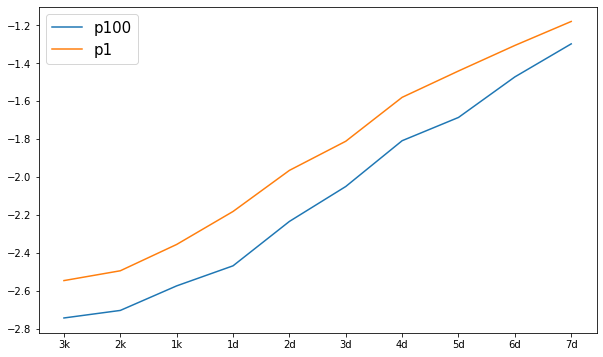

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
ranks = ["3k", "2k", "1k", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]
plt.plot(ranks, aggreg100["mean_deltascoreLead"], label = "p100")
#plt.plot(ranks, aggreg10["mean_deltascoreLead"], label = "p10")
plt.plot(ranks, aggreg1["mean_deltascoreLead"], label = "p1")
plt.legend(fontsize =  15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
features =['mean_deltawinrate',	'mean_deltascoreLead', 'dispersy_scoreLead',	'beautiful_percent',	'mean_utility',	'beautifulS_percent', 'Score25p', 'Score75p',
          'median_scorelead', 'mean_deltaScore50p', 'mean_deltaSelfPlay', 'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p', 'mean_deltawinrate 10', 'beautiful_percent 10', 'beautifulS_percent 10',
       'mean_deltascoreLead 10', 'mean_deltaSelfPlay 10',
       'dispersy_scoreLead 10', 'mean_utility 10', 'mean_deltawinrate 20',
       'beautiful_percent 20', 'beautifulS_percent 20',
       'mean_deltascoreLead 20', 'mean_deltaSelfPlay 20',
       'dispersy_scoreLead 20', 'mean_utility 20', 'mean_deltawinrate yose',
       'beautiful_percent yose', 'beautifulS_percent yose',
       'mean_deltascoreLead yose', 'mean_deltaSelfPlay yose',
       'dispersy_scoreLead yose', 'mean_utility yose', 'mean_dist',
       'dispersy_dist']
X = data_p1[features]
Y = data_p1['W_rating']
y = []
for r in Y:
  if (r[1] == 'k'):
    y.append(-(int(r[0]) - int('1')))
  else:
    y.append(int(r[0])) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=111)       

[Текст ссылки](https://)# Тестирование моделей

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X_train, y_train)      
lin_pred = reg.predict(X_test)
print(mean_absolute_error(lin_pred, y_test))  

1.9741087069560537


In [ ]:
d = {'name': features, 'importance': reg.coef_}
df = pd.DataFrame(data=d)
df = df.sort_values(by = ['importance'], ascending=False)
df.head(50)

,name,importance
4,mean_utility,153.861594
21,mean_deltawinrate 20,53.783244
5,beautifulS_percent,10.435732
28,mean_deltawinrate yose,9.040336
12,Winrate75p,8.305584
20,mean_utility 10,7.654147
1,mean_deltascoreLead,2.795745
22,beautiful_percent 20,2.582224
35,mean_dist,1.020263
9,mean_deltaScore50p,0.621479


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
clf = RandomForestRegressor(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
tree_pred = clf.predict(X_test)
print(mean_absolute_error(tree_pred, y_test)) 

1.9325186608880294


In [ ]:
d = {'name': features, 'importance': clf.feature_importances_}
df = pd.DataFrame(data=d)
df = df.sort_values(by = ['importance'], ascending=False)
df.head(50)

,name,importance
9,mean_deltaScore50p,0.255268
35,mean_dist,0.057920
22,beautiful_percent 20,0.043258
6,Score25p,0.037382
1,mean_deltascoreLead,0.033303
26,dispersy_scoreLead 20,0.030512
15,beautiful_percent 10,0.030202
23,beautifulS_percent 20,0.028462
12,Winrate75p,0.027202
4,mean_utility,0.027164


In [ ]:
clf = RandomForestRegressor(max_depth=10, random_state=0)
sX_test = X_test.copy()
sX_train = X_train.copy()
sX_test['linear_prediction'] = reg.predict(X_test)
sX_train['linear_prediction'] = reg.predict(X_train)
clf.fit(sX_train, y_train)
treelin_pred = clf.predict(sX_test)
print(mean_absolute_error(treelin_pred, y_test)) 

1.846452724573529


In [ ]:
d = {'name': sX_test.columns, 'importance': clf.feature_importances_}
df = pd.DataFrame(data=d)
df = df.sort_values(by = ['importance'], ascending=False)
df.head(50)

,name,importance
37,linear_prediction,0.496523
35,mean_dist,0.024161
26,dispersy_scoreLead 20,0.021524
23,beautifulS_percent 20,0.021114
22,beautiful_percent 20,0.019861
12,Winrate75p,0.019743
8,median_scorelead,0.018659
11,Winrate25p,0.017585
33,dispersy_scoreLead yose,0.017535
6,Score25p,0.016915


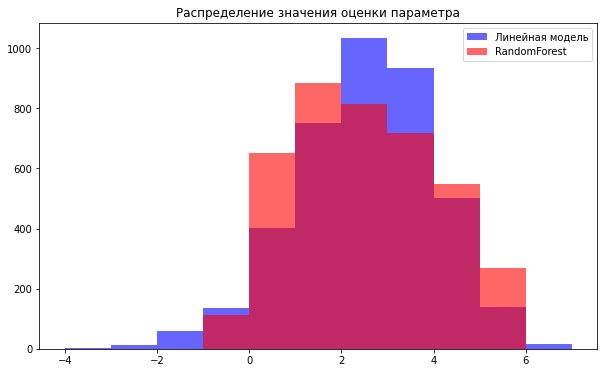

In [ ]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    lin_pred,
    bins = bins,
    alpha = 0.6,
    color = 'blue',
    label = 'Линейная модель'
)
plt.hist(
    tree_pred,
    bins = bins,
    alpha = 0.6,
    color = 'red',
    label = 'RandomForest'
)
plt.legend()
plt.show()

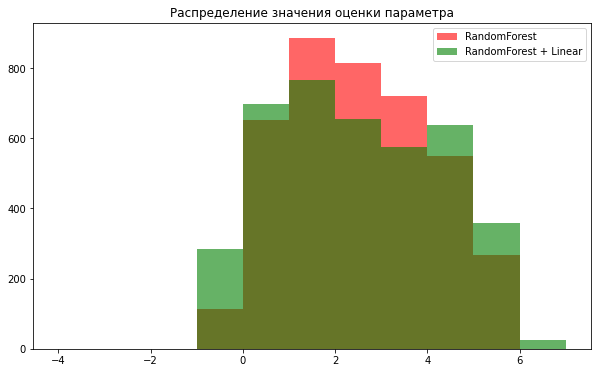

In [ ]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    tree_pred,
    bins = bins,
    alpha = 0.6,
    color = 'red',
    label = 'RandomForest'
)
plt.hist(
    treelin_pred,
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'RandomForest + Linear'
)
plt.legend()
plt.show()

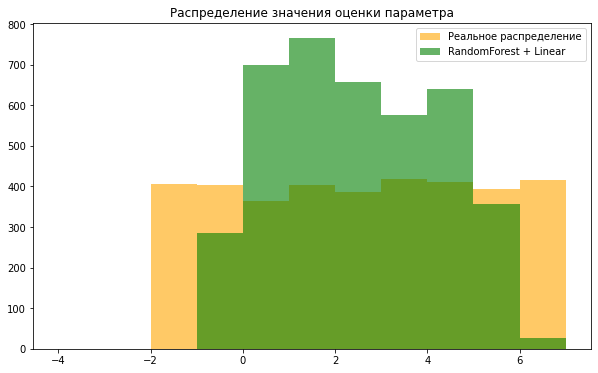

In [ ]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    y_test,
    bins = bins,
    alpha = 0.6,
    color = 'orange',
    label = 'Реальное распределение'
)
plt.hist(
    treelin_pred,
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'RandomForest + Linear'
)
plt.legend()
plt.show()

Учитывая, что изначальное распределение равномерное, можно заметить, что модели мало предсказывают 2k и ниже, возможно это связано с тем, что даже игроки высоких данов могут сыграть плохо и модель получает слишком большие штрафы если предсказывает их в нижние ранги.

С 6-7 даном проблема тоже есть, но её меньше.

In [ ]:
from sklearn import linear_model
bayes = linear_model.BayesianRidge()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)
print(mean_absolute_error(bayes_pred, y_test)) 

1.9800686564285328


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(mean_absolute_error(knn_pred, y_test)) 


2.34975


In [ ]:
clf = RandomForestRegressor(max_depth=10, random_state=0)
sX_test = X_test.copy()
sX_train = X_train.copy()
sX_test['linear_prediction'] = reg.predict(X_test)
sX_train['linear_prediction'] = reg.predict(X_train)
sX_test['bayes_prediction'] = bayes.predict(X_test)
sX_train['bayes_prediction'] = bayes.predict(X_train)
clf.fit(sX_train, y_train)
treemany_pred = clf.predict(sX_test)
print(mean_absolute_error(treemany_pred, y_test)) 

1.8498276071415485


In [ ]:
d = {'name': sX_test.columns, 'importance': clf.feature_importances_}
df = pd.DataFrame(data=d)
df = df.sort_values(by = ['importance'], ascending=False)
df.head(50)

,name,importance
37,linear_prediction,0.352817
38,bayes_prediction,0.155921
35,mean_dist,0.025176
26,dispersy_scoreLead 20,0.021955
23,beautifulS_percent 20,0.019651
12,Winrate75p,0.019491
22,beautiful_percent 20,0.018958
8,median_scorelead,0.017692
33,dispersy_scoreLead yose,0.017396
36,dispersy_dist,0.016891
